In [7]:
def folium_deepnote_show(m):
    data = m.get_root().render()
    data_fixed_height = data.replace('width: 100%;height: 100%', 'width: 100%').replace('height: 100.0%;', 'height: 609px;', 1)
    display(HTML(data_fixed_height))

In [8]:
!pip install beautifulsoup4
# The 3 libraries for scraping 
from bs4 import BeautifulSoup
import requests # library to handle requests
import pandas as pd # library for data analsysis

# Easier to get the HTML table content into an actual table 
from IPython.display import Image # libraries for displaying images

In [9]:
import pandas as pd
import requests

url = "https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
df = df_list[0]
df.head()

,"Arrondissement[1],[n 1]",Quartiers,Quartiers.1,Population en1999 (hab.)[2],Superficie(ha)[2],Densitéhab/km2,Plan
0,1er arrondissementdit « du Louvre »,1er,Saint-Germain-l'Auxerrois,1 672,869,1 924,NaN
1,1er arrondissementdit « du Louvre »,2e,Halles,8 984,412,21 806,NaN
2,1er arrondissementdit « du Louvre »,3e,Palais-Royal,3 195,274,11 661,NaN
3,1er arrondissementdit « du Louvre »,4e,Place-Vendôme,3 044,269,11 316,NaN
4,2e arrondissementdit « de la Bourse »,5e,Gaillon,1 345,188,7 154,NaN


In [10]:
df.drop(df.iloc[:,[3,4,6]], inplace = True, axis = 1)
df.head()

,"Arrondissement[1],[n 1]",Quartiers,Quartiers.1,Densitéhab/km2
0,1er arrondissementdit « du Louvre »,1er,Saint-Germain-l'Auxerrois,1 924
1,1er arrondissementdit « du Louvre »,2e,Halles,21 806
2,1er arrondissementdit « du Louvre »,3e,Palais-Royal,11 661
3,1er arrondissementdit « du Louvre »,4e,Place-Vendôme,11 316
4,2e arrondissementdit « de la Bourse »,5e,Gaillon,7 154


In [11]:
df= df.rename(columns={'Arrondissement[1],[n 1]' : 'Arrondissement', 'Quartiers' : 'Quartier Num', 
                       'Quartiers.1' : 'Quartier Name', 'Densitéhab/km2' : 'Densité'})
df.head()

,Arrondissement,Quartier Num,Quartier Name,Densité
0,1er arrondissementdit « du Louvre »,1er,Saint-Germain-l'Auxerrois,1 924
1,1er arrondissementdit « du Louvre »,2e,Halles,21 806
2,1er arrondissementdit « du Louvre »,3e,Palais-Royal,11 661
3,1er arrondissementdit « du Louvre »,4e,Place-Vendôme,11 316
4,2e arrondissementdit « de la Bourse »,5e,Gaillon,7 154


In [12]:
df['Arrondissement'] = df['Arrondissement'].str[:2]
df['Arrondissement'] = df['Arrondissement'].str.replace('s', '')
df['Arrondissement'] = df['Arrondissement'].str.replace('n','')
df['Arrondissement'] = df['Arrondissement'].str.replace('r','')
df['Arrondissement'] = df['Arrondissement'].str.replace('t','')
df['Arrondissement'] = df['Arrondissement'].str.replace('er','')
df['Arrondissement'] = df['Arrondissement'].str.replace('e','')
df['Arrondissement'] = df['Arrondissement'].str.replace('er','')
df['Quartier Num'] = df['Quartier Num'].str.replace('er','')
df['Quartier Num'] = df['Quartier Num'].str.replace('e','')
df['Densité'] = df['Densité'].str.replace('\xa0','') #I remove de space between the 'non-breaking spaces' so I can convert the Density
                                                    # into float 
df.head()

,Arrondissement,Quartier Num,Quartier Name,Densité
0,1,1,Saint-Germain-l'Auxerrois,1924
1,1,2,Halles,21806
2,1,3,Palais-Royal,11661
3,1,4,Place-Vendôme,11316
4,2,5,Gaillon,7154


In [13]:
df['Densité'] = pd.to_numeric(df['Densité'])

In [14]:
df.dtypes

Arrondissement    object
Quartier Num      object
Quartier Name     object
Densité            int64
dtype: object

### Geocoder

In [15]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#### Geographical coordinates of the Quartiers

In [16]:
# define the dataframe columns
column_names = ['Arrondissement', 'Quartier', 'Latitude', 'Longitude', 'Densité'] 

# instantiate the dataframe
Quartiers = pd.DataFrame(columns=column_names)
Quartiers

,Arrondissement,Quartier,Latitude,Longitude,Densité


In [17]:
for i, j, k in zip(df['Quartier Name'], df['Arrondissement'], df['Densité']):
    Arrondissement = j
    Densité = k
    address = 'Paris ' + i
    geolocator = Nominatim(user_agent="Mathis Doulson")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Quartiers = Quartiers.append({'Arrondissement': Arrondissement,
                          'Quartier': address,
                          'Latitude' : latitude,
                          'Longitude' : longitude,
                           'Densité' : Densité }, ignore_index=True)
    print('The geograpical coordinate of Paris', i , 'are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris Saint-Germain-l'Auxerrois are 48.859699, 2.3406358.
The geograpical coordinate of Paris Halles are 48.8621801, 2.3458118.
The geograpical coordinate of Paris Palais-Royal are 48.8646388, 2.335815102063103.
The geograpical coordinate of Paris Place-Vendôme are 48.867463400000005, 2.329428116825194.
The geograpical coordinate of Paris Gaillon are 48.869135150000005, 2.332908770335507.
The geograpical coordinate of Paris Vivienne are 48.86885895, 2.3393625582679.
The geograpical coordinate of Paris Mail are 48.8680539, 2.344592949731121.
The geograpical coordinate of Paris Bonne-Nouvelle are 48.8702836, 2.3508959.
The geograpical coordinate of Paris Arts-et-Métiers are 48.8666934, 2.3539857.
The geograpical coordinate of Paris Enfants-Rouges are 48.864240949999996, 2.3625854822185506.
The geograpical coordinate of Paris Archives are 48.862533, 2.3594595.
The geograpical coordinate of Paris Sainte-Avoye are 48.862699750000004, 2.354135471358302.
The geog

In [19]:
Quartiers.head()

,Arrondissement,Quartier,Latitude,Longitude,Densité
0,1,Paris Saint-Germain-l'Auxerrois,48.859699,2.340636,1924
1,1,Paris Halles,48.862180,2.345812,21806
2,1,Paris Palais-Royal,48.864639,2.335815,11661
3,1,Paris Place-Vendôme,48.867463,2.329428,11316
4,2,Paris Gaillon,48.869135,2.332909,7154


#### Représentation sur la carte des différents arrondissements

In [20]:
address = 'Paris'

geolocator = Nominatim(user_agent="Mathis Doulson")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8588897, 2.3200410217200766.


In [13]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, Quartier in zip(Quartiers['Latitude'], Quartiers['Longitude'], Quartiers['Quartier']):
    label = '{}'.format(Quartier)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_paris)  
    
map_paris

## 3. Analyze Each Neighborhood

#### Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = '2CM31BSM4Y34GOANQH5EYJZEOMLT43RWDPFXPBCKAGMUHKXC' # your Foursquare ID
CLIENT_SECRET = 'ITVVSM1EY51OUT4F5AAP3IAKOPIQRKAN0OKLIQQLSZBZ4WEG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2CM31BSM4Y34GOANQH5EYJZEOMLT43RWDPFXPBCKAGMUHKXC
CLIENT_SECRET:ITVVSM1EY51OUT4F5AAP3IAKOPIQRKAN0OKLIQQLSZBZ4WEG


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=300):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Quartier', 
                  'Quartier Latitude', 
                  'Quartier Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
Paris_venues = getNearbyVenues(names=Quartiers['Quartier'],
                                   latitudes=Quartiers['Latitude'],
                                   longitudes=Quartiers['Longitude'])

Paris Saint-Germain-l'Auxerrois
Paris Halles
Paris Palais-Royal
Paris Place-Vendôme
Paris Gaillon
Paris Vivienne
Paris Mail
Paris Bonne-Nouvelle
Paris Arts-et-Métiers
Paris Enfants-Rouges
Paris Archives
Paris Sainte-Avoye
Paris Saint-Merri
Paris Saint-Gervais
Paris Arsenal
Paris Notre-Dame
Paris Saint-Victor
Paris Jardin-des-Plantes
Paris Val-de-Grâce
Paris Sorbonne
Paris Monnaie
Paris Odéon
Paris Notre-Dame-des-Champs
Paris Saint-Germain-des-Prés
Paris Saint-Thomas-d'Aquin
Paris Invalides
Paris École-Militaire
Paris Gros-Caillou
Paris Champs-Élysées
Paris Faubourg-du-Roule
Paris Madeleine
Paris Europe
Paris Saint-Georges
Paris Chaussée-d'Antin
Paris Faubourg-Montmartre
Paris Rochechouart
Paris Saint-Vincent-de-Paul
Paris Porte-Saint-Denis
Paris Porte-Saint-Martin
Paris Hôpital-Saint-Louis
Paris Folie-Méricourt
Paris Saint-Ambroise
Paris Roquette
Paris Sainte-Marguerite
Paris Bel-Air
Paris Picpus
Paris Bercy
Paris Quinze-Vingts
Paris Salpêtrière
Paris Gare
Paris Maison-Blanche
Paris Cr

In [17]:
Paris_venues.head()

,Quartier,Quartier Latitude,Quartier Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,La Vénus de Milo (Vénus de Milo),48.859943,2.337234,Exhibit
1,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Cour Carrée du Louvre,48.860360,2.338543,Pedestrian Plaza
2,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Musée du Louvre,48.860847,2.336440,Art Museum
3,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Cour Napoléon,48.861172,2.335088,Plaza
4,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,Pont des Arts,48.858565,2.337635,Bridge


In [18]:
Paris_venues.shape

(2819, 7)

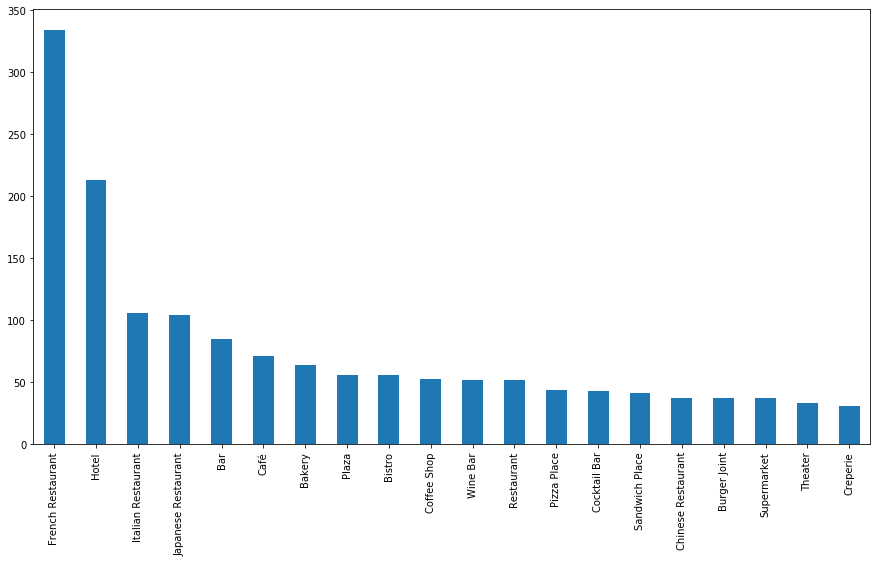

In [82]:
Venues_categories_grouped = Paris_venues['Venue Category'].value_counts(sort=True)
f, ax = plt.subplots(figsize=(15,8))
Venues_categories_grouped.iloc[0:20].plot(ax=ax, kind='bar')

In [19]:
Paris_venues_grouped = Paris_venues.groupby('Quartier').count()
Paris_venues_grouped

,Quartier Latitude,Quartier Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Quartier,,,,,,
Paris Amérique,5,5,5,5,5,5
Paris Archives,17,17,17,17,17,17
Paris Arsenal,17,17,17,17,17,17
Paris Arts-et-Métiers,50,50,50,50,50,50
Paris Auteuil,17,17,17,17,17,17
Paris Batignolles,62,62,62,62,62,62
Paris Bel-Air,8,8,8,8,8,8
Paris Belleville,44,44,44,44,44,44
Paris Bercy,14,14,14,14,14,14


In [20]:
Paris_venues = Paris_venues.groupby('Quartier').filter(lambda x: x['Quartier'].count() >= 8)
Paris_venues.shape

(2803, 7)

In [83]:
Paris_venues_grouped = Paris_venues['Quartier'].value_counts(sort=True)
Paris_venues_grouped

Paris Place-Vendôme                97
Paris Folie-Méricourt              83
Paris Saint-Gervais                79
Paris Montparnasse                 77
Paris Palais-Royal                 76
Paris Halles                       76
Paris Faubourg-Montmartre          72
Paris Mail                         72
Paris Chaussée-d'Antin             71
Paris École-Militaire              69
Paris Gaillon                      69
Paris Sainte-Avoye                 68
Paris Saint-Germain-des-Prés       67
Paris Enfants-Rouges               65
Paris Porte-Saint-Martin           65
Paris Rochechouart                 64
Paris Batignolles                  62
Paris Saint-Georges                61
Paris Quinze-Vingts                61
Paris Saint-Merri                  60
Paris Gros-Caillou                 58
Paris Sorbonne                     57
Paris Monnaie                      56
Paris Notre-Dame-des-Champs        56
Paris Arts-et-Métiers              50
Paris Roquette                     47
Paris Saint-

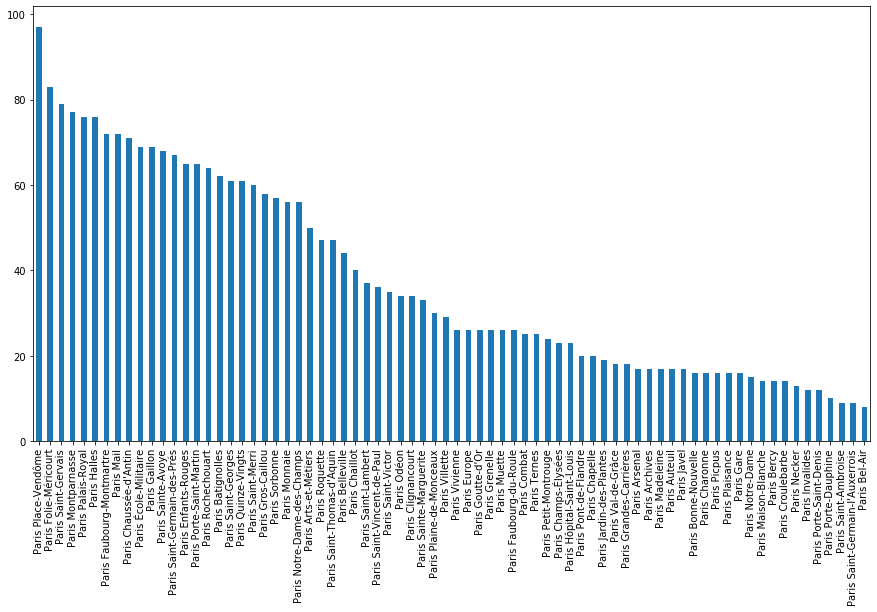

In [85]:
f, ax = plt.subplots(figsize=(15,8))
Paris_venues_grouped.plot(ax=ax, kind='bar')

In [22]:
# We now have 74 quarters instead of the 80 original
Paris_venues_grouped.shape

(74, 6)

In [23]:
# one hot encoding
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Paris_onehot['Quartier'] = Paris_venues['Quartier'] 

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]

Paris_onehot.head()

,Quartier,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Paris Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
Paris_grouped = Paris_onehot.groupby('Quartier').mean().reset_index()
Paris_grouped

,Quartier,Accessories Store,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Paris Archives,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.0,0.0
1,Paris Arsenal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,Paris Arts-et-Métiers,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,0.0,0.0
3,Paris Auteuil,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.0,0.0
4,Paris Batignolles,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.048387,0.000000,0.000000,0.000000,0.0,0.0
5,Paris Bel-Air,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,Paris Belleville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022727,0.000000,0.000000,0.068182,0.045455,0.000000,0.000000,0.000000,0.0,0.0
7,Paris Bercy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,Paris Bonne-Nouvelle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
9,Paris Chaillot,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.0,0.0


#### Let's print each neighborhood along with the top 5 most common venues


In [25]:
num_top_venues = 5

for Quarters in Paris_grouped['Quartier']:
    print("----"+Quarters+"----")
    temp = Paris_grouped[Paris_grouped['Quartier'] == Quarters].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Paris Archives----
                 venue  freq
0       Sandwich Place  0.18
1  Japanese Restaurant  0.12
2          Supermarket  0.06
3       Farmers Market  0.06
4    Health Food Store  0.06


----Paris Arsenal----
               venue  freq
0  French Restaurant  0.35
1       Cocktail Bar  0.12
2             Museum  0.06
3       Gourmet Shop  0.06
4                Spa  0.06


----Paris Arts-et-Métiers----
                 venue  freq
0                  Bar  0.08
1    French Restaurant  0.08
2   Chinese Restaurant  0.06
3         Cocktail Bar  0.06
4  Japanese Restaurant  0.06


----Paris Auteuil----
                venue  freq
0   French Restaurant  0.24
1  Italian Restaurant  0.12
2       Deli / Bodega  0.06
3    Asian Restaurant  0.06
4            Bus Stop  0.06


----Paris Batignolles----
               venue  freq
0  French Restaurant  0.15
1        Pizza Place  0.10
2              Hotel  0.08
3    Thai Restaurant  0.05
4           Wine Bar  0.05


----Paris Bel-Air----
     

                venue  freq
0      Chocolate Shop  0.06
1   French Restaurant  0.06
2         Supermarket  0.06
3           Bookstore  0.06
4  Italian Restaurant  0.06


----Paris Palais-Royal----
                 venue  freq
0  Japanese Restaurant  0.13
1                Hotel  0.08
2    French Restaurant  0.08
3                 Café  0.07
4   Italian Restaurant  0.05


----Paris Petit-Montrouge----
                 venue  freq
0                Hotel  0.12
1    French Restaurant  0.12
2               Bistro  0.08
3            Multiplex  0.04
4  Fried Chicken Joint  0.04


----Paris Picpus----
                  venue  freq
0   Japanese Restaurant  0.12
1                 Hotel  0.12
2             Gastropub  0.06
3  Gym / Fitness Center  0.06
4       Thai Restaurant  0.06


----Paris Place-Vendôme----
               venue  freq
0              Hotel  0.15
1  French Restaurant  0.14
2      Jewelry Store  0.06
3     Chocolate Shop  0.03
4       Cocktail Bar  0.03


----Paris Plaine-de-Moncea

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
import numpy as np # library to handle data in a vectorized manner

In [28]:
num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Quartier']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Paris_venues_sorted = pd.DataFrame(columns=columns)
Paris_venues_sorted['Quartier'] = Paris_grouped['Quartier']

for ind in np.arange(Paris_grouped.shape[0]):
    Paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

Paris_venues_sorted.head(10)

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Paris Archives,Sandwich Place,Japanese Restaurant,Health Food Store,Cheese Shop,Okonomiyaki Restaurant,Garden,Supermarket,Bistro
1,Paris Arsenal,French Restaurant,Cocktail Bar,Gourmet Shop,Park,Gym,Supermarket,Vegetarian / Vegan Restaurant,Tapas Restaurant
2,Paris Arts-et-Métiers,French Restaurant,Bar,Japanese Restaurant,Chinese Restaurant,Cocktail Bar,Wine Bar,Vietnamese Restaurant,Gastropub
3,Paris Auteuil,French Restaurant,Italian Restaurant,Dessert Shop,Bistro,Wine Shop,Market,Pizza Place,Deli / Bodega
4,Paris Batignolles,French Restaurant,Pizza Place,Hotel,Thai Restaurant,Wine Bar,Japanese Restaurant,Bar,Bakery
5,Paris Bel-Air,Indian Restaurant,Salon / Barbershop,Ice Cream Shop,Spanish Restaurant,French Restaurant,Pizza Place,Chinese Restaurant,Sushi Restaurant
6,Paris Belleville,Bar,Chinese Restaurant,Vietnamese Restaurant,French Restaurant,Supermarket,Coffee Shop,Thai Restaurant,Japanese Restaurant
7,Paris Bercy,French Restaurant,Hotel,Convenience Store,Brasserie,Restaurant,Museum,Beer Garden,Lounge
8,Paris Bonne-Nouvelle,Bar,Korean Restaurant,Steakhouse,Clothing Store,Cocktail Bar,Restaurant,Comedy Club,Cheese Shop
9,Paris Chaillot,French Restaurant,Art Museum,Lebanese Restaurant,Plaza,Museum,Chinese Restaurant,Italian Restaurant,Hotel


In [29]:
print('There are {} uniques categories.'.format(len(Paris_venues['Venue Category'].unique())))

There are 251 uniques categories.


# 4. Cluster Neighborhoods

In [30]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [31]:
#find best k

Paris_grouped_clustering = Paris_grouped.drop('Quartier', 1)

best_k = []
for k in range (1, 45):
 
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Paris_grouped_clustering)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans.labels_

    # Sum of distances of samples to their closest cluster center
    inertia = kmeans.inertia_
    best_k.append([k,inertia])
    print ("k:",k, " cost:", inertia)
best_k = pd.DataFrame(best_k)
best_k.columns = ['k', 'Cost']
best_k

k: 1  cost: 3.9256436410730644
k: 2  cost: 3.4876634334780188
k: 3  cost: 3.3119484276884705
k: 4  cost: 3.218329461993373
k: 5  cost: 3.024284959483835
k: 6  cost: 2.8782956846054444
k: 7  cost: 2.740385249191582
k: 8  cost: 2.5908464792021455
k: 9  cost: 2.4830512641327673
k: 10  cost: 2.3895886632720154
k: 11  cost: 2.265593679657041
k: 12  cost: 2.1762243486604076
k: 13  cost: 2.072390861538633
k: 14  cost: 2.031451621103693
k: 15  cost: 1.916778402816932
k: 16  cost: 1.8667315522129506
k: 17  cost: 1.8000467829719093
k: 18  cost: 1.7178969092040774
k: 19  cost: 1.6281819353397033
k: 20  cost: 1.5771375337341709
k: 21  cost: 1.498110293555321
k: 22  cost: 1.4337744618732553
k: 23  cost: 1.4001179010893083
k: 24  cost: 1.3448536103786561
k: 25  cost: 1.285336524852692
k: 26  cost: 1.2422310744294982
k: 27  cost: 1.2007173234766857
k: 28  cost: 1.1421105716481286
k: 29  cost: 1.101052728392483
k: 30  cost: 1.059582281613148
k: 31  cost: 1.0197087719962448
k: 32  cost: 0.9795215231367

,k,Cost
0,1,3.925644
1,2,3.487663
2,3,3.311948
3,4,3.218329
4,5,3.024285
5,6,2.878296
6,7,2.740385
7,8,2.590846
8,9,2.483051
9,10,2.389589


In [32]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

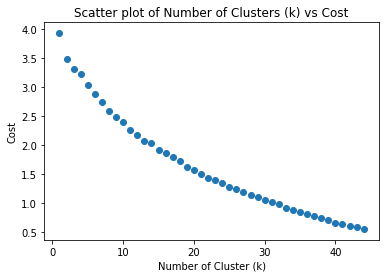

In [33]:
#plot cost values of k's as calculated above, to find best k value ('elbow')
plt.scatter(best_k['k'],best_k['Cost'])
plt.title("Scatter plot of Number of Clusters (k) vs Cost")
plt.ylabel("Cost")
plt.xlabel("Number of Cluster (k)")
plt.show

In [34]:
#cluster Quarters by best k (lowest cost as calculated above, but at the same time fitting the data - see 'elbow' of line plot)
# best k value is set at 8 
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 3, 1, 3, 3, 3, 1, 2, 3])

In [35]:
# add clustering labels
Paris_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Paris_merged = Quartiers

# merge Quartiers (containing Arrondissements and Quartiers) with Paris Venues to add latitude/longitude for each Quartiers
Paris_merged = Quartiers.merge(Paris_venues_sorted.set_index('Quartier'), how='right', on='Quartier')

Paris_merged.head() 

,Arrondissement,Quartier,Latitude,Longitude,Densité,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,1,Paris Saint-Germain-l'Auxerrois,48.860211,2.336299,1924,4,Plaza,Bridge,Pedestrian Plaza,Shopping Mall,Art Museum,Government Building,Historic Site,Exhibit
1,1,Paris Halles,48.864614,2.334396,21806,0,Japanese Restaurant,Hotel,Café,French Restaurant,Italian Restaurant,Udon Restaurant,Korean Restaurant,Cosmetics Shop
2,1,Paris Palais-Royal,48.864639,2.335815,11661,0,Japanese Restaurant,Hotel,French Restaurant,Café,Italian Restaurant,Korean Restaurant,Wine Bar,Cosmetics Shop
3,1,Paris Place-Vendôme,48.867463,2.329428,11316,1,Hotel,French Restaurant,Jewelry Store,Hotel Bar,Japanese Restaurant,Italian Restaurant,Cocktail Bar,Boutique
4,2,Paris Gaillon,48.869135,2.332909,7154,0,Hotel,Italian Restaurant,Jewelry Store,Japanese Restaurant,Historic Site,Plaza,Coffee Shop,Cocktail Bar


In [36]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Latitude'], Paris_merged['Longitude'], Paris_merged['Quartier'], Paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
from wordcloud import WordCloud, STOPWORDS

In [40]:
stopwords = set(STOPWORDS)

#### Cluster 1 (Red)

In [41]:
Cluster_1 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 0, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_1

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
1,Paris Halles,Japanese Restaurant,Hotel,Café,French Restaurant,Italian Restaurant,Udon Restaurant,Korean Restaurant,Cosmetics Shop
2,Paris Palais-Royal,Japanese Restaurant,Hotel,French Restaurant,Café,Italian Restaurant,Korean Restaurant,Wine Bar,Cosmetics Shop
4,Paris Gaillon,Hotel,Italian Restaurant,Jewelry Store,Japanese Restaurant,Historic Site,Plaza,Coffee Shop,Cocktail Bar
5,Paris Vivienne,Wine Bar,Pedestrian Plaza,Japanese Restaurant,Concert Hall,Bistro,Bookstore,Bubble Tea Shop,Building
6,Paris Mail,French Restaurant,Bakery,Cocktail Bar,Wine Bar,Salad Place,Bar,Coffee Shop,Plaza
9,Paris Enfants-Rouges,French Restaurant,Wine Bar,Hotel,Moroccan Restaurant,Sandwich Place,Burger Joint,Restaurant,Bistro
10,Paris Archives,Sandwich Place,Japanese Restaurant,Health Food Store,Cheese Shop,Okonomiyaki Restaurant,Garden,Supermarket,Bistro
12,Paris Saint-Merri,Gay Bar,Art Gallery,French Restaurant,Plaza,Bookstore,Souvenir Shop,Bakery,Clothing Store
13,Paris Saint-Gervais,French Restaurant,Hotel,Italian Restaurant,Clothing Store,Wine Bar,Coffee Shop,Seafood Restaurant,Gay Bar
15,Paris Notre-Dame,French Restaurant,Bookstore,Pedestrian Plaza,Brasserie,Bistro,Garden,Tapas Restaurant,Lebanese Restaurant


This cluster is characterized by Restaurants, Bar, Bistro 

#### Cluster 2 (Purple)

In [42]:
Cluster_2 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 1, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_2

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
3,Paris Place-Vendôme,Hotel,French Restaurant,Jewelry Store,Hotel Bar,Japanese Restaurant,Italian Restaurant,Cocktail Bar,Boutique
14,Paris Arsenal,French Restaurant,Cocktail Bar,Gourmet Shop,Park,Gym,Supermarket,Vegetarian / Vegan Restaurant,Tapas Restaurant
16,Paris Saint-Victor,French Restaurant,Hotel,Café,Plaza,Wine Bar,Szechuan Restaurant,Syrian Restaurant,Bistro
20,Paris Monnaie,French Restaurant,Hotel,Ice Cream Shop,Plaza,Seafood Restaurant,Japanese Restaurant,Museum,Sandwich Place
25,Paris Invalides,French Restaurant,Plaza,Tea Room,Train Station,Hotel,Cultural Center,Smoke Shop,Embassy / Consulate
26,Paris École-Militaire,Hotel,French Restaurant,Italian Restaurant,Coffee Shop,Café,Japanese Restaurant,Ice Cream Shop,Food & Drink Shop
27,Paris Gros-Caillou,French Restaurant,Italian Restaurant,Hotel,Bakery,Bistro,Café,Convenience Store,Romanian Restaurant
29,Paris Faubourg-du-Roule,French Restaurant,Hotel,Cocktail Bar,Art Gallery,Grocery Store,Resort,Shoe Store,Café
31,Paris Europe,Hotel,Italian Restaurant,French Restaurant,Café,Thai Restaurant,Theater,Korean Restaurant,Music Store
32,Paris Saint-Georges,French Restaurant,Hotel,Bakery,Lounge,Bar,Plaza,Cupcake Shop,Restaurant


This cluster constitutes an outlier. It is characterized by museums, famous buildings and plazas.

#### Cluster 3 (Navy Blue)

In [43]:
Cluster_3 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 2, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_3

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
7,Paris Bonne-Nouvelle,Bar,Korean Restaurant,Steakhouse,Clothing Store,Cocktail Bar,Restaurant,Comedy Club,Cheese Shop
37,Paris Porte-Saint-Denis,Bar,Bistro,Clothing Store,Cheese Shop,Burger Joint,Brasserie,Hotel,Steakhouse


This cluster constitutes an outlier. It is characterized by gardens, zoo and museums.

#### Cluster 4


In [44]:
Cluster_4 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 3, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_4

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
8,Paris Arts-et-Métiers,French Restaurant,Bar,Japanese Restaurant,Chinese Restaurant,Cocktail Bar,Wine Bar,Vietnamese Restaurant,Gastropub
11,Paris Sainte-Avoye,French Restaurant,Coffee Shop,Lebanese Restaurant,Hotel,Japanese Restaurant,Deli / Bodega,Café,Gourmet Shop
22,Paris Notre-Dame-des-Champs,French Restaurant,Hotel,Café,Bakery,Sandwich Place,Ice Cream Shop,Chinese Restaurant,Steakhouse
34,Paris Faubourg-Montmartre,French Restaurant,Hotel,Wine Bar,Pizza Place,Japanese Restaurant,Creperie,Mexican Restaurant,Fish & Chips Shop
35,Paris Rochechouart,French Restaurant,Restaurant,Hotel,Bakery,Japanese Restaurant,Bistro,Chinese Restaurant,Cocktail Bar
38,Paris Porte-Saint-Martin,Bar,French Restaurant,Theater,Burger Joint,Pizza Place,Turkish Restaurant,Hotel,Cocktail Bar
39,Paris Hôpital-Saint-Louis,Café,French Restaurant,Wine Bar,Bistro,Bar,Pizza Place,Diner,Southern / Soul Food Restaurant
40,Paris Folie-Méricourt,French Restaurant,Bar,Bakery,Restaurant,Japanese Restaurant,Bistro,Pizza Place,Wine Bar
41,Paris Saint-Ambroise,Bed & Breakfast,Electronics Store,French Restaurant,Wine Bar,Comfort Food Restaurant,Restaurant,South American Restaurant,Cocktail Bar
42,Paris Roquette,French Restaurant,Italian Restaurant,Hotel,Bistro,Sandwich Place,Japanese Restaurant,Café,Bar


This cluster is characterized by Hotels, Restaurants, Cafés, Brasseries

#### Cluster 5 (Turquoise blue)


In [45]:
Cluster_5 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 4, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_5

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Paris Saint-Germain-l'Auxerrois,Plaza,Bridge,Pedestrian Plaza,Shopping Mall,Art Museum,Government Building,Historic Site,Exhibit


This cluster is characterized by non-french restaurants, grocery stores or supermarkets, bakeries.

#### Cluster 6 (bright green)


In [46]:
Cluster_6 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 5, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_6

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
17,Paris Jardin-des-Plantes,Science Museum,Garden,Zoo Exhibit,Museum,Botanical Garden,Asian Restaurant,Snack Place,French Restaurant


This cluster is similar to cluster 1. It is characterized by Restaurants, Hotels, Bars, parks.

#### Cluster 7 (Bright Orange)


In [47]:
Cluster_7 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 6, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_7

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
49,Paris Maison-Blanche,Vietnamese Restaurant,Thai Restaurant,Cantonese Restaurant,Cambodian Restaurant,Gym / Fitness Center,Park,Bakery,Farmers Market


This cluster constitutes an outlier. It is mainly characterized by asian restaurants

#### Cluster 8 (Orange)


In [48]:
Cluster_8 = Paris_merged.loc[Paris_merged['Cluster Labels'] == 7, Paris_merged.columns[[1] + list(range(6, Paris_merged.shape[1]))]]
Cluster_8

,Quartier,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
68,Paris Chapelle,Indian Restaurant,Hotel,Bakery,Theater,Supermarket,Motorcycle Shop,Metro Station,Grocery Store


This cluster is characterized by French Restaurants, Hotels, Museums and Cafes

### Wordclouds for each cluster

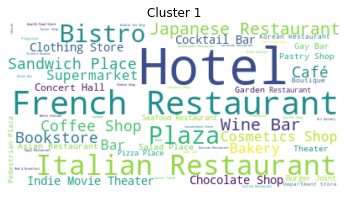

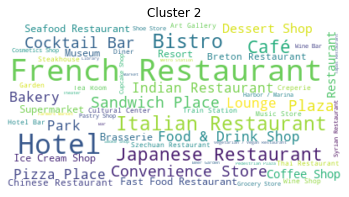

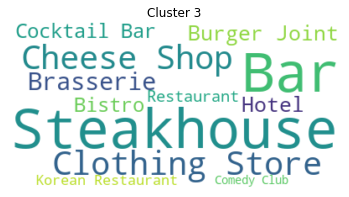

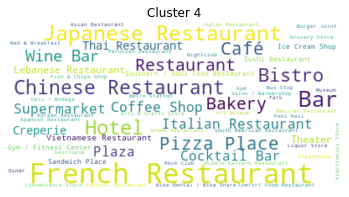

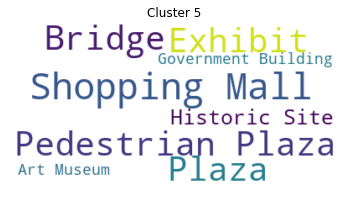

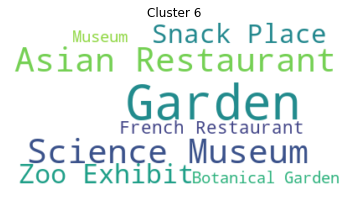

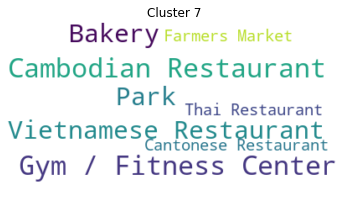

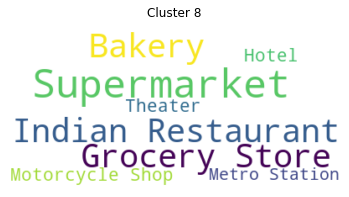

In [49]:
# Start with one review:

for i,j in zip([Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8], range(1,9)) :

# Start with one review:

    # Si l'on veut générér un wordcloud par mot : Cluster_1_string = i.iloc[0:,1:].to_string(header=False) et generate instead of 
    # generate_from_frequencies
    Cluster_1_string = i.iloc[0:,1:].stack().value_counts()

    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color='white', max_words=60).generate_from_frequencies(Cluster_1_string)

    # Display the generated image:
    plt.title('Cluster {0}'.format(j))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Keep only the quarters of the interest clusters

In [86]:
Interest_Quarters = Cluster_1.append([Cluster_2, Cluster_4, Cluster_7])
Interest_Quarters = pd.DataFrame(Interest_Quarters.iloc[:, 0])
print(Interest_Quarters.shape)
Interest_Quarters.head()

(69, 1)


,Quartier
1,Paris Halles
2,Paris Palais-Royal
4,Paris Gaillon
5,Paris Vivienne
6,Paris Mail


In [87]:
Interest_Quarters =  Interest_Quarters.merge(Quartiers.set_index('Quartier'), how='left', on='Quartier')
Interest_Quarters.head()

,Quartier,Arrondissement,Latitude,Longitude,Densité
0,Paris Halles,1,48.864614,2.334396,21806
1,Paris Palais-Royal,1,48.864639,2.335815,11661
2,Paris Gaillon,2,48.869135,2.332909,7154
3,Paris Vivienne,2,48.868859,2.339363,11955
4,Paris Mail,2,48.868054,2.344593,20802


In [88]:
# create map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, Quartier, Densité in zip(Interest_Quarters['Latitude'], Interest_Quarters['Longitude'], 
                                       Interest_Quarters['Quartier'], Interest_Quarters['Densité']):
    label = '{}'.format(Quartier)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius= Densité/3000,
        popup= label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_paris)  
    
map_paris